In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
# import gmaps
import os

# Create dataframe with Pandas
gun_violence_data = pd.read_csv("../gun-violence-data_01-2013_03-2018.csv")

# confirm df creation and check data
gun_violence_data.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

In [2]:
# create df showing kills and injuries by state
state_casualties = gun_violence_data.groupby(gun_violence_data["state"])

# check number of states
count = state_casualties["state"].nunique()
count


state
Alabama                 1
Alaska                  1
Arizona                 1
Arkansas                1
California              1
Colorado                1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 1
Hawaii                  1
Idaho                   1
Illinois                1
Indiana                 1
Iowa                    1
Kansas                  1
Kentucky                1
Louisiana               1
Maine                   1
Maryland                1
Massachusetts           1
Michigan                1
Minnesota               1
Mississippi             1
Missouri                1
Montana                 1
Nebraska                1
Nevada                  1
New Hampshire           1
New Jersey              1
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Ohio                    1
Oklahoma                1
Oregon                  1
Pennsy

In [3]:
# Check states are correct and no errors since there were 51 states
for state in state_casualties:
    print(state[0], end=" | ")


Alabama | Alaska | Arizona | Arkansas | California | Colorado | Connecticut | Delaware | District of Columbia | Florida | Georgia | Hawaii | Idaho | Illinois | Indiana | Iowa | Kansas | Kentucky | Louisiana | Maine | Maryland | Massachusetts | Michigan | Minnesota | Mississippi | Missouri | Montana | Nebraska | Nevada | New Hampshire | New Jersey | New Mexico | New York | North Carolina | North Dakota | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | South Carolina | South Dakota | Tennessee | Texas | Utah | Vermont | Virginia | Washington | West Virginia | Wisconsin | Wyoming | 

In [4]:
## No repeats or errors in data frame. However District of Columbia has been separated out in the data.
# kill totals for plotting purposes
kill_sum = state_casualties["n_killed"].sum()

# injured totals for plotting purposes
injury_sum = state_casualties["n_injured"].sum()

# create data frame of kills and injuries by state for plotting
casualty_sum = pd.DataFrame({"Kill Count":kill_sum,
    "Injury Count":injury_sum})

# combine District of Columbia and Virginia since DC isn't a state
VirginaDC = casualty_sum.loc[['District of Columbia', 'Virginia']].sum()
VirginaDC.name=f"District of Columbia \n& Virginia\n\n"

# Add New Virginia total to data frame
casualty_sum = casualty_sum.append(VirginaDC)

# drop disctrict of Columbia from and Virginia since from df
casualty_sum.drop(["Virginia", 'District of Columbia'], inplace = True )

casualty_sum

,Kill Count,Injury Count
state,,
Alabama,1880,2998
Alaska,267,325
Arizona,1094,1096
Arkansas,773,1347
California,5562,7644
Colorado,796,1133
Connecticut,341,1258
Delaware,217,853
Florida,3909,7072


,Kill Count,Injury Count
state,,
California,5562,7644
Texas,5046,6106
Florida,3909,7072
Illinois,3409,13514
Ohio,2508,5703
Georgia,2456,4056
Pennsylvania,2395,5056
North Carolina,2225,4629
Louisiana,2179,4398


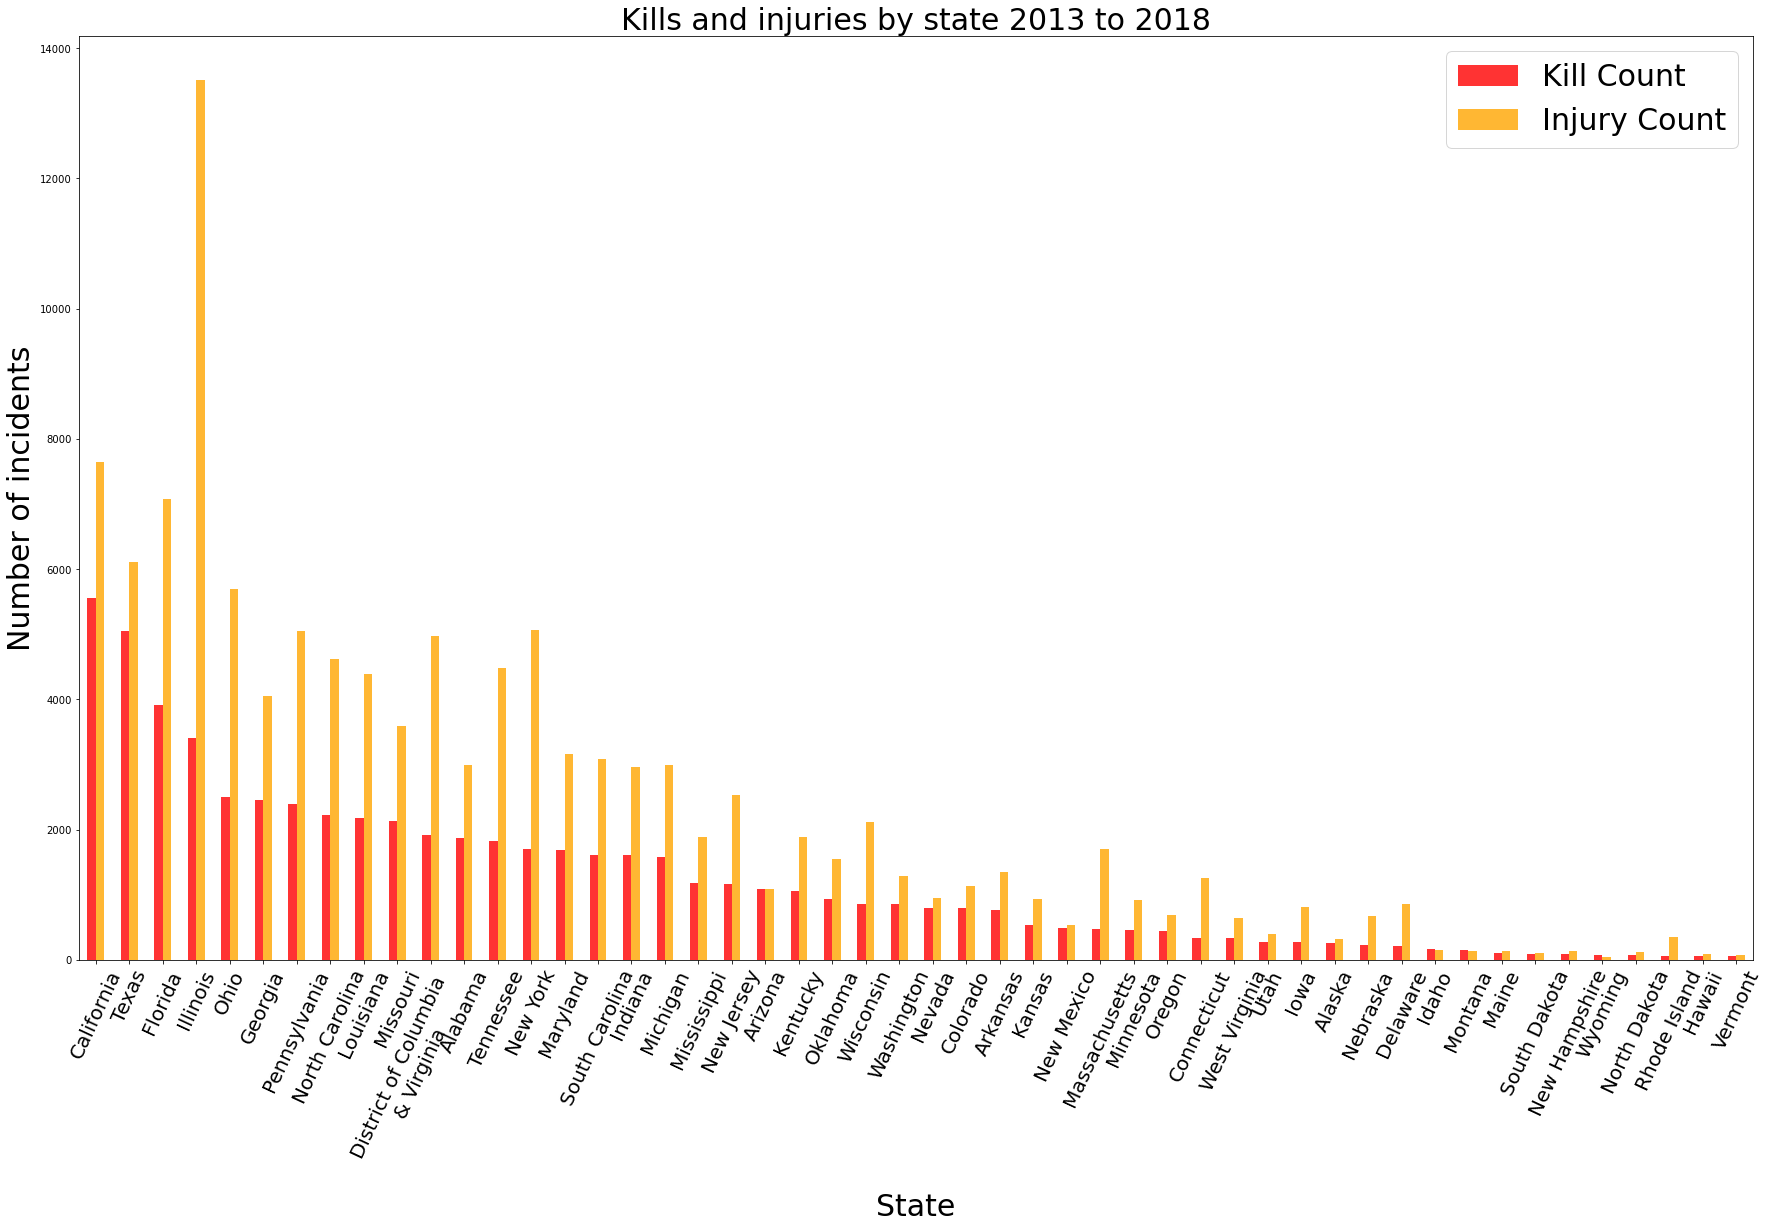

In [70]:
# bar plot of injuries and kills by state
fig_k1 = plt.figure
colors= ["red","orange"]

# sort by descending and plot chart
sorted_df =casualty_sum.sort_values(by="Kill Count",ascending=False)
sorted_df.plot(kind="bar",color= colors,alpha=0.8,figsize=(30, 17))
plt.xticks(rotation=65, fontsize=20)

# Title and labels
plt.title("Kills and injuries by state 2013 to 2018",fontsize=30)
plt.ylabel("Number of incidents", fontsize=30)
plt.xlabel("State",fontsize=30)
plt.legend(fontsize=30)

# save image
plt.savefig("Images/fig_k1_bar_chart.png")

fig_k1

The r-value is: 0.8679658550022051


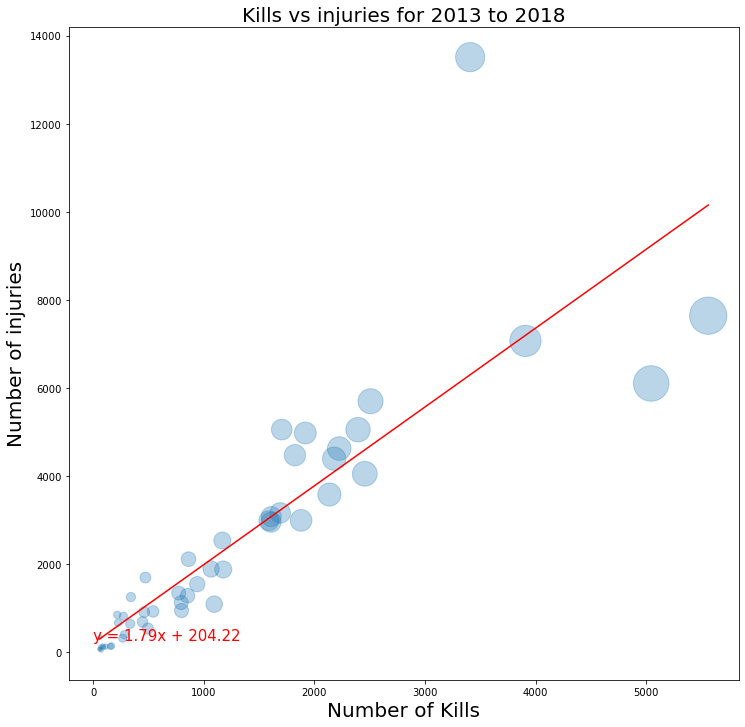

In [6]:
# create scatter plot to see if there is a positve correlation of injuries to kills by state
fig_k2 = plt.figure
size = sorted_df["Kill Count"]

# linear regression calc and plot
from scipy.stats import linregress
#
(slope, intercept, rvalue, pvalue, stderr) = linregress(sorted_df["Kill Count"],
                                                        sorted_df["Injury Count"])
regress_values = sorted_df["Kill Count"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
sorted_df.plot(kind="scatter", x="Kill Count", y="Injury Count",
            alpha=0.3,s=(size/4),figsize=(12,12))

plt.plot(sorted_df["Kill Count"],regress_values,"r-")
plt.annotate(line_eq,(0,275),fontsize=15,color="red")

# Title and labels
plt.title("Kills vs injuries for 2013 to 2018",fontsize=20)
plt.ylabel("Number of injuries", fontsize=20)
plt.xlabel("Number of Kills",fontsize=20)

# save image
plt.savefig("Images/fig_k2_scatter_plot.png")

# show image and rvalue
fig_k2
print(f"The r-value is: {rvalue}")


In [7]:
# create df showing kills and injuries by City
city_county_df = gun_violence_data.groupby(gun_violence_data["city_or_county"])   
# check number of cities or counties
city_count = city_county_df["city_or_county"].nunique()
city_count

city_or_county
Abbeville                    1
Abbotsford                   1
Abbott                       1
Abbott Township              1
Abbottstown                  1
                            ..
Zumbro Falls                 1
Zumbrota                     1
Zuni (Zuni Pueblo)           1
Zwolle                       1
jefferson parish (county)    1
Name: city_or_county, Length: 12898, dtype: int64

In [8]:
# sum casualties by city
city_sum=city_county_df.sum()

# kill totals for plotting purposes
kill_city = city_sum["n_killed"]

# injured totals for plotting purposes
injury_city = city_sum["n_injured"]

# create data frame of kills and injuries
casualty_city = pd.DataFrame({"Kill Count":kill_city,
    "Injury Count":injury_city})

# select cities sorted by death then injury count
sort_casualty_city =casualty_city.sort_values(by =["Kill Count", "Injury Count"],ascending=False)

# check top 10 cities
sort_casualty_city.head(10)


,Kill Count,Injury Count
city_or_county,,
Chicago,2104,10427
Houston,1145,1255
Baltimore,1055,2427
Saint Louis,919,1783
Philadelphia,901,2326
New Orleans,703,1892
Los Angeles,636,553
Memphis,623,1690
Indianapolis,616,1131


In [83]:
# select top 50 cities and create df with new index
# top_50=sort_casualty_city.head(50)
# top_50.reset_index()

# create data for pie charts
top_50 =sort_casualty_city.loc[sort_casualty_city["Kill Count"]>168]
rest_of_cities=sort_casualty_city.loc[sort_casualty_city["Kill Count"]<169]
five_or_less_incidents=sort_casualty_city.loc[sort_casualty_city["Kill Count"]<6]
problem_cities=sort_casualty_city.loc[(sort_casualty_city['Kill Count'] <169 
                                    ) & (sort_casualty_city['Kill Count'] >5)]

# Total the values for each dataset
t_50= top_50.sum()#Kill Count 22277 Injury Count 52536
roc =rest_of_cities.sum()#Kill Count 38191 Injury Count 65866
prob=problem_cities.sum()#Kill Count 27336 Injury Count 51593

pharaoh_df = pd.DataFrame(
    {"Dataset": ["Top 50 Cities", "Rest of US", "US less low incidents"],
     "Kill Count": [22277, 38191, 27336]
     }
)
pharaoh_df
data_type

# t_50.reset_index()

# pie_data = [{"Kill Count":"Top 50 Cities": 22277}]


                    #    "Rest of America",roc,"Problem Cities",prob})


# t= np.array(t_50)
# tr = t.tolist()

# tr

# t
# pie_data

# Gather the rest of the cities into df
# rest_of_cities= sort_casualty_city.iloc[ 50:12897,]


# # Sum total kills and injury counts
# top_50_sum=top_50.sum()
# rest_of_cities= rest_of_cities.sum()


# top_50_sum #kills=22277, injuries=52536
# rest_of_cities #kills= 38191, injuries= 65866
# fig_k3, axs = plt.subplots(1, 3)
# incidents =[74813, 104057]

# colors= ["red","blue, green, yellow"]
# labels = ["Top 50 cities", "The rest of American cities"]
# explode = (0.1, 0)
# # Plot
# plt.pie(incidents, explode=explode, labels=None, colors=colors,
#         autopct="%1.1f%%", startangle=140,radius=50, frame=False)
# plt.legend(labels)
# plt.axis('equal')
# plt.show()
#### EXPORT GRAPH// merge df'

,Dataset,Kill Count
0,Top 50 Cities,22277
1,Rest of US,38191
2,US less low incidents,27336


In [10]:
clean_casualties= casualty_city[casualty_city['Kill Count']>5]
clean_casualties

#Create bins and labels
kill_bins = [11,25,50,75,100,150,200,300,500,np.inf]
kill_brackets = ["11-25","26-50","51-75","76-100","101-150","151-200","201-300","301-500","500+"]


# #use pd.cut function to catergorise the existing incidences
kill_city = pd.cut(clean_casualties["Kill Count"],kill_bins,labels=kill_brackets,include_lowest=False)

# check bins and counts by sorting by value_counts and reset_index
kill_df =kill_city.value_counts()
kill_df.index.names=["Number of Incidents"]
sorted_kill_df = kill_df.reset_index()

# Fix last 3 rows so they are ascending by bins
sorted_kill_df.iloc[7], sorted_kill_df.iloc[8] =sorted_kill_df.iloc[8], sorted_kill_df.iloc[7]
sorted_kill_df.iloc[7], sorted_kill_df.iloc[6] = sorted_kill_df.iloc[6], sorted_kill_df.iloc[7]
sorted_kill_df


,Number of Incidents,Kill Count
0,11-25,362
1,26-50,150
2,51-75,44
3,101-150,36
4,76-100,21
5,151-200,17
6,201-300,11
7,301-500,16
8,500+,15


In [11]:
# labels =sorted_kill_df["Number of Incidents"]
# size= sorted_kill_df["Kill Count"]

# sorted_kill_df.plot(kind="scatter", x="Kill Count", y="Number of incidents",
#                     s= size, figsize=(8,8),labels=labels)


# sorted_kill_df.plot(kind="bar",alpha=0.8,figsize=(30, 17))
# plt.xticks(rotation=65, fontsize=20)
# plt.title("Kills and injuries in cities from 2013 to 2018",fontsize=30)
# plt.ylabel("Number of Kills", fontsize=30)
# plt.xlabel("Range of Incidents", fontsize=30)
# plt.legend(fontsize=30)

# plt.show()


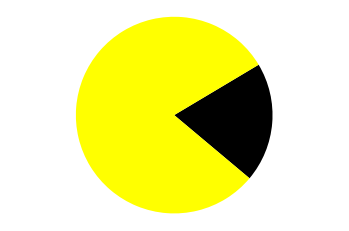

In [12]:
#Pac-Man Pie chart for Josh 
sizes = [60, 245]
# Plot
plt.pie(sizes, startangle=320, colors= ["black","yellow"])
plt.axis('equal')
plt.show()